# Homework: Irma Avdic

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipydis
import time

In [20]:
! [ -e ./slimmed_realestate_data.csv ] || wget https://raw.githubusercontent.com/argonne-lcf/ai-science-training-series/main/01_intro_AI_on_Supercomputer/slimmed_realestate_data.csv
data = pd.read_csv('slimmed_realestate_data.csv')
print(data.columns)

Index(['Unnamed: 0', 'SalePrice', 'GrLivArea'], dtype='object')


In [49]:
def model(x,m,b):
   return m * x + b

In [50]:
def loss(x,y,m,b):
   y_predicted = model(x,m,b)
   return np.power( y - y_predicted, 2 )

In [51]:
def updated_m(x,y,m,b,learning_rate):
   dL_dm = - 2 * x * (y - model(x,m,b))
   dL_dm = np.mean(dL_dm)
   return m - learning_rate * dL_dm

def updated_b(x,y,m,b,learning_rate):
   dL_db = - 2 * (y - model(x,m,b))
   dL_db = np.mean(dL_db)
   return b - learning_rate * dL_db

In [33]:
def loss(x,y,m,b):
   y_predicted = model(x,m,b)
   return np.power( y - y_predicted, 2 )

In [34]:
def updated_m(x,y,m,b,learning_rate):
   dL_dm = - 2 * x * (y - model(x,m,b))
   dL_dm = np.mean(dL_dm)
   return m - learning_rate * dL_dm

def updated_b(x,y,m,b,learning_rate):
   dL_db = - 2 * (y - model(x,m,b))
   dL_db = np.mean(dL_db)
   return b - learning_rate * dL_db

In [52]:
def training_function(data, batch_size, learning_rate_m, learning_rate_b, m=5., b=1000., ):
    """
    Plots the outcome from learning of a linear fit on given data using batch gradient descent.
    
    Parameters:
    - data: Pandas DataFrame.
    - batch_size: Number of samples in each batch.
    - learning_rate_m: Learning rate for the slope.
    - learning_rate_b: Learning rate for the intercept.

    Returns:
    - plot
    """

    # use these to plot our progress over time
    loss_history = []

    data_x = data['GrLivArea'].to_numpy()
    data_y = data['SalePrice'].to_numpy()
    
    # we run our loop over the entire dataset the same number of times
    loop_N = 30*len(data)//batch_size
    
    # run the optimization loop
    for i in range(loop_N):
        # randomly select a batch of data
        batch_indices = np.random.choice(len(data_x), batch_size, replace=False)
        batch_x = data_x[batch_indices]
        batch_y = data_y[batch_indices]
        
        # update slope and intercept based on the batch data
        m = updated_m(batch_x, batch_y, m, b, learning_rate_m)
        b = updated_b(batch_x, batch_y, m, b, learning_rate_b)
    
        # calculate the loss value
        loss_value = np.mean(loss(data_x,data_y,m,b))
        
        # keep a history of our loss values
        loss_history.append(loss_value)
        
        # print our progress
        print('[%03d]  dy_i = %.2f * x + %.2f     previously calculated: y_i = %.2f * x + %.2f    loss: %f' % (i,m,b,m_calc,b_calc,loss_value))
        
        # close/delete previous plots
        plt.close('all')
        
        # create a 1 by 2 plot grid
        fig,ax = plt.subplots(1,2,figsize=(18,6),dpi=80)
        # lot our usual output
        plot_data(data_x,data_y,m,b,ax[0])
        
        # here we also plot the calculated linear fit for comparison
        line_x = np.arange(data_x.min(),data_x.max())
        line_y = line_x * m_calc + b_calc
        ax[0].plot(line_x,line_y,'b-',label='calculated')
        # add a legend to the plot and x/y labels
        ax[0].legend()
        ax[0].set_xlabel('square footage')
        ax[0].set_ylabel('sale price')
        
        # plot the loss 
        loss_x = np.arange(0,len(loss_history))
        loss_y = np.asarray(loss_history)
        ax[1].plot(loss_x,loss_y, 'o-')
        ax[1].set_yscale('log')
        ax[1].set_xlabel('loop step')
        ax[1].set_ylabel('loss')
        plt.show()
        # clears the plot when the next plot is ready to show.
        ipydis.clear_output(wait=True)

## Batch size = 32

[515]  dy_i = 85.12 * x + 35508.62     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1487804676.590380


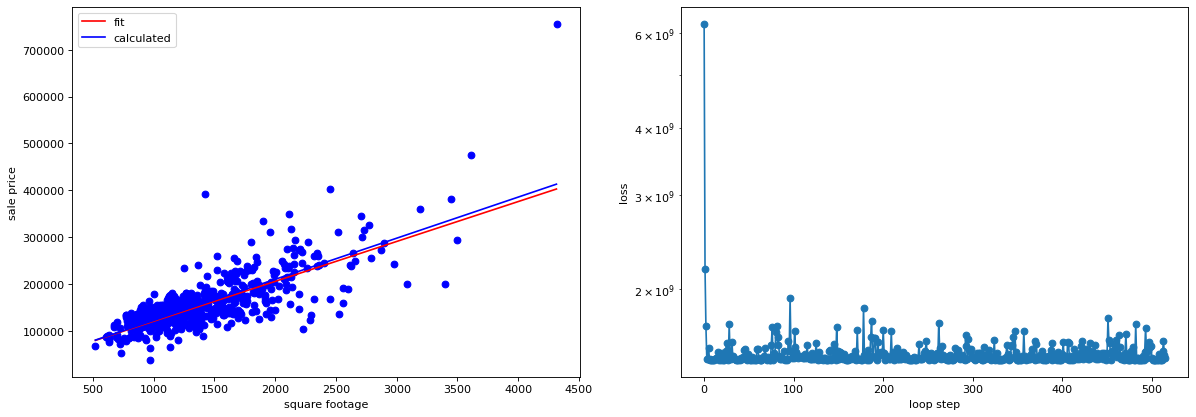

In [53]:
training_function(data=data, batch_size=32, learning_rate_m=1e-7, learning_rate_b=1e-1)

## Batch size = 64

[257]  dy_i = 89.61 * x + 33358.15     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1480504617.033888


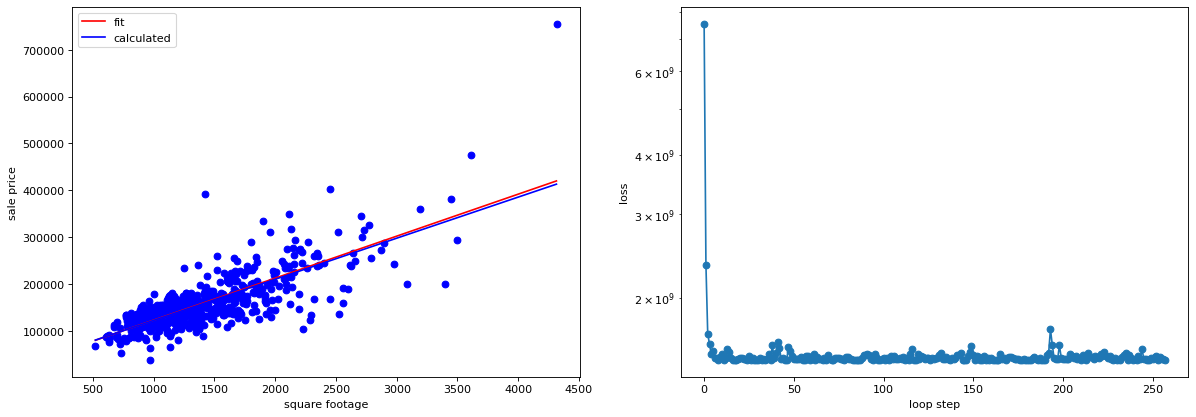

In [37]:
training_function(data=data, batch_size=64, learning_rate_m=1e-7, learning_rate_b=1e-1)

## Batch size = 128

[128]  dy_i = 88.02 * x + 34952.81     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1478245486.529132


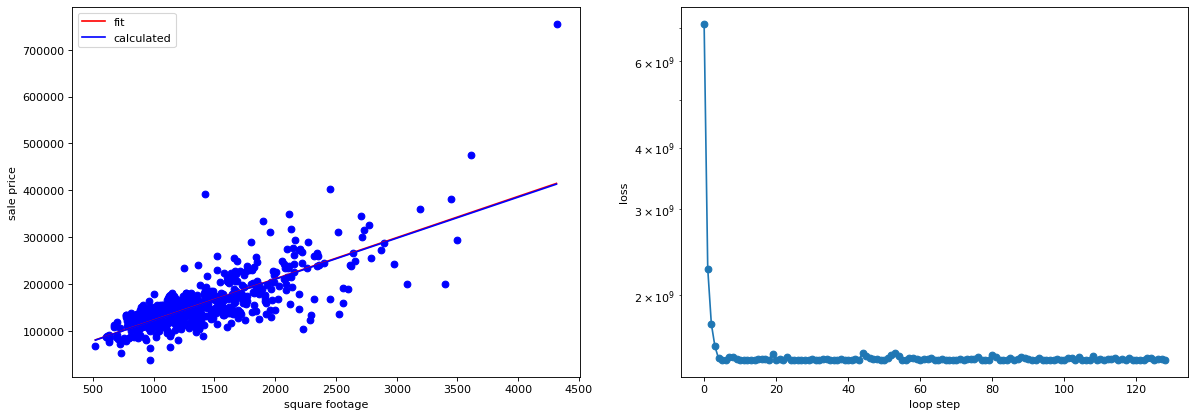

In [38]:
training_function(data=data, batch_size=128, learning_rate_m=1e-7, learning_rate_b=1e-1)

## Batch size = 256

[063]  dy_i = 89.79 * x + 33540.49     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1482026781.820652


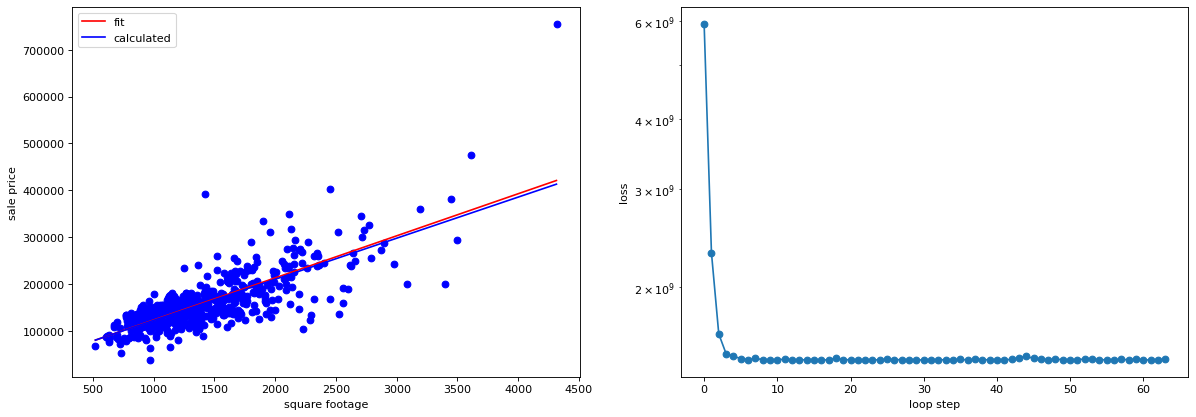

In [39]:
training_function(data=data, batch_size=256, learning_rate_m=1e-7, learning_rate_b=1e-1)

## Batch size = 512

[031]  dy_i = 88.75 * x + 33223.35     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1478093810.650304


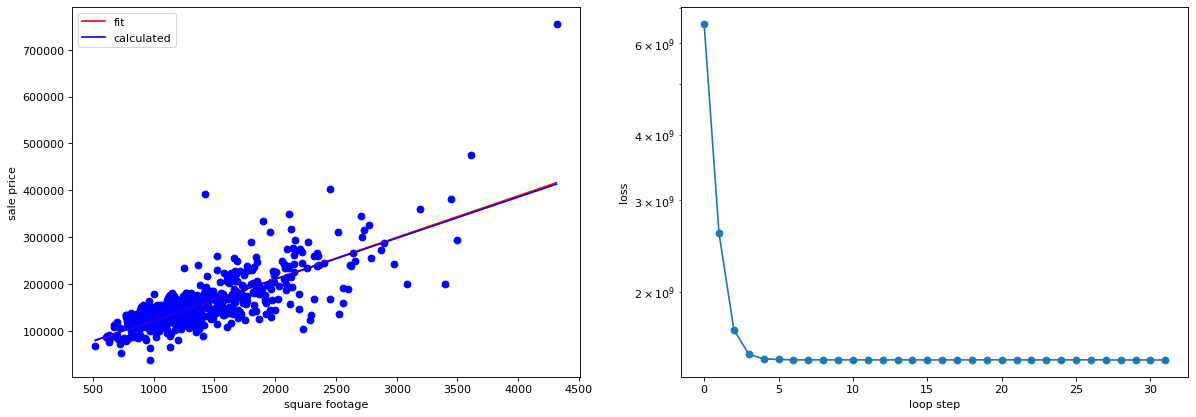

In [40]:
training_function(data=data, batch_size=512, learning_rate_m=1e-7, learning_rate_b=1e-1)

# Bonus: Irma Avdic

## N = 1

[257]  dy_i = 83.93 * x + 39618.97     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1481848208.402229


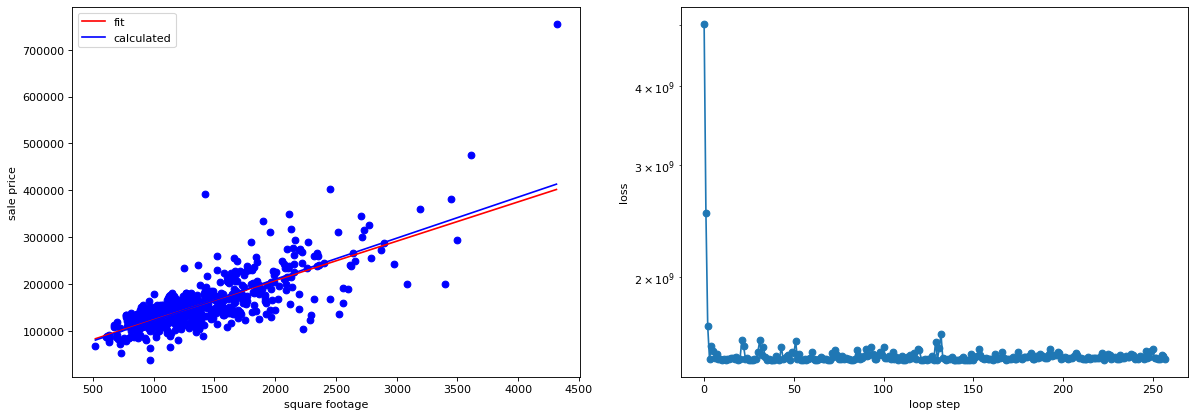

In [42]:
N=1
training_function(data=data, batch_size=64*N, learning_rate_m=1e-7*N, learning_rate_b=1e-1*N)

## N = 2

[128]  dy_i = 85.53 * x + 41080.86     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1489886091.337482


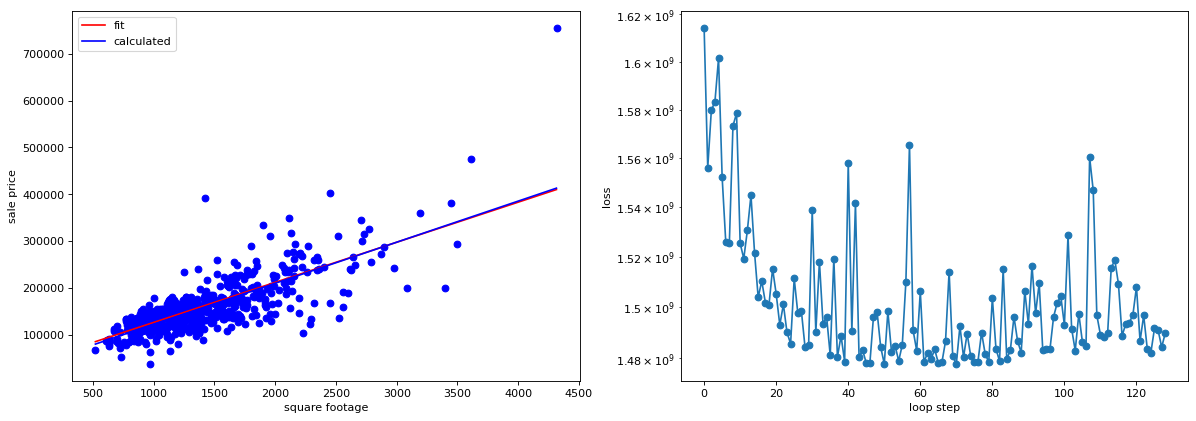

In [46]:
N=2
training_function(data=data, batch_size=64*N, learning_rate_m=1e-7*N, learning_rate_b=1e-1*N)

## N = 4

[063]  dy_i = 84.83 * x + 39267.07     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1480264391.868726


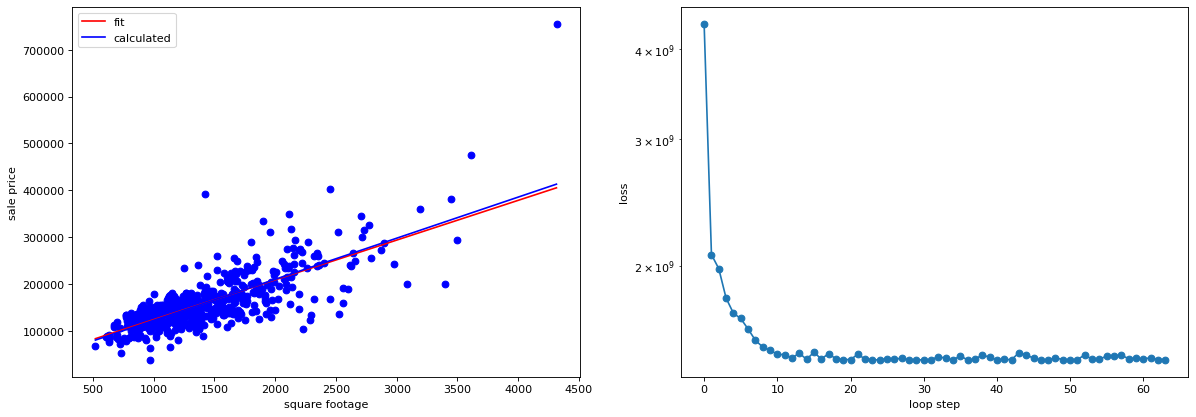

In [47]:
N=4
training_function(data=data, batch_size=64*N, learning_rate_m=1e-7*N, learning_rate_b=1e-1*N)

## N = 8

[031]  dy_i = -554922.26 * x + 935653357.42     previously calculated: y_i = 87.69 * x + 34754.08    loss: 108378185729962480.000000


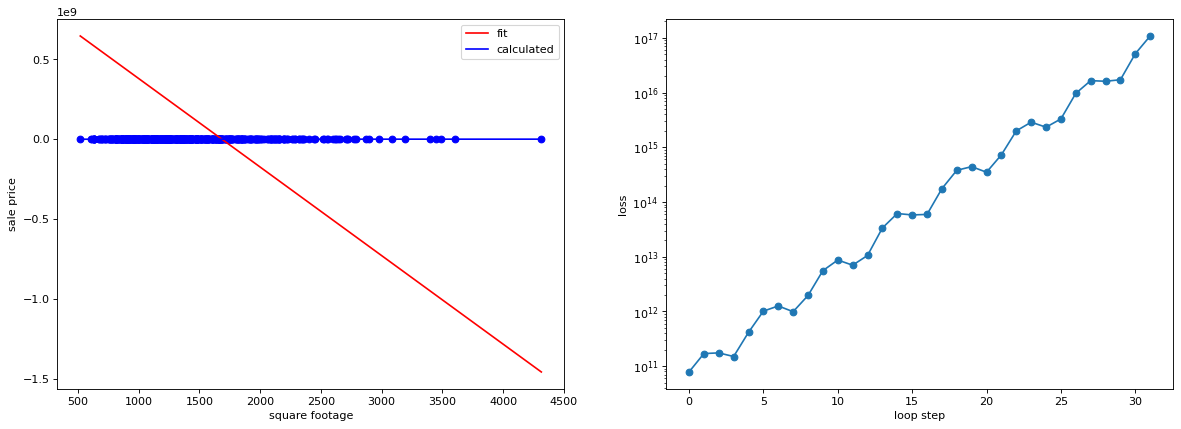

In [45]:
N=8
training_function(data=data, batch_size=64*N, learning_rate_m=1e-7*N, learning_rate_b=1e-1*N)